## Experiment 6 - Time Series Analysis
## Nikita Chitre 
## Roll no - 4
## Batch A


Objectives: To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations.

* In this notebook, we will use Acea Smart Water Anatytics data about water availability in waterbody Aquifier Petrignano.
* We will first perform data cleaning by handling missing values, converting into time series objects.
* Then, we will visualize the time series and understand patterns in it.
* Further, we will decompose the time series into trend, seasonality components.
* Then we will check if time series is stationary and also visualize autocorrelation.
* Lastly, we will visualize white noise. 

Data description: 

Waterbody: Aquifer Petrignano

Description: 
 

*   The wells field of the alluvial plain between "Ospedalicchio di Bastia Umbra" and "Petrignano" is fed by three underground aquifers.
*    The Aquifer can be considered a water table groundwater and is also fed by the Chiascio river.
*   The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.


Features:


*   Rainfall_Bastia_Umbra - quantity of rain falling
*   Temperature Bastia Umbra - indicates the temperature, expressed in °C, detected by the thermometric station Bastia Umbra
*   Volume_C10_Petrignano - volume of water taken from the drinking water treatment plant Petrignano
*   Hydrometry_Fiume_Chiascio_Petrignano - indicates the groundwater level, expressed in meters (m), detected by the hydrometric station Fiume_Chiascio_Petrignano. 

Targets:  
*  Depth_to_Groundwater_P25 - indicates the groundwater level, expressed in ground level (meters from the ground floor)


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams

### Reading the data from csv file

In [ ]:
# Read csv file
columns = ['Date',	'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra', 
           'Temperature_Petrignano', 'Volume_C10_Petrignano',	'Hydrometry_Fiume_Chiascio_Petrignano']
df = pd.read_csv('/content/drive/MyDrive/Aquifer_Petrignano.csv', usecols=columns)

Printing first five rows in the dataset

In [ ]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.04,NaN,NaN,NaN,NaN


Printing last five rows in the dataset

In [ ]:
df.tail()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
5218,26/06/2020,0.0,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.18,26.9,26.0,-30602.880,2.4
5222,30/06/2020,0.0,-25.25,27.3,26.5,-31878.144,2.4


In [ ]:
df.shape

(5223, 7)

We can see that dataset contains 5223 rows and 7 columns. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P25              5184 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Temperature_Petrignano                4199 non-null   float64
 5   Volume_C10_Petrignano                 5025 non-null   float64
 6   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(6), object(1)
memory usage: 285.8+ KB


The columns like Rainfall_Bastia_Umbra, Temperature_Bastia_Umbra, Temperature_Petrignano, Hydrometry_Fiume_Chiascio_Petrignano have missing values 

### Data Cleaning

#### Checking the missing values of Rainfall column 

In [ ]:
df_ = df.copy()
df_['Date'] = pd.to_datetime(df_['Date'], format = '%d/%m/%Y')
df_[df_['Rainfall_Bastia_Umbra'].isna()].sort_values(by = 'Date')

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1019,2008-12-27,NaN,-31.50,NaN,NaN,-27844.992,NaN
1020,2008-12-28,NaN,-31.41,NaN,NaN,-25792.992,NaN
1021,2008-12-29,NaN,-31.37,NaN,NaN,-27260.928,NaN
1022,2008-12-30,NaN,-31.39,NaN,NaN,-29258.496,NaN


* Here we can see that the missing values for rainfall column are before 2009. 
* Hence this is a very old part of the data and hence is not benificial for current predictions. 
* So we will drop these missing values 

#### Removing rows with NaN value in Rainfall Column

In [ ]:
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

In [ ]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-2.1,-29854.656,2.3


In [ ]:
df.shape

(4199, 7)

Now the dataset has 4199 rows

#### Convert into Time Series Objects

To convert into time series, we need to convert the datatype of Date column from object to DateTime. 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4199 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P25              4172 non-null   float64       
 3   Temperature_Bastia_Umbra              4199 non-null   float64       
 4   Temperature_Petrignano                4199 non-null   float64       
 5   Volume_C10_Petrignano                 4198 non-null   float64       
 6   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 229.8 KB


Hence, Date column has been converted to DateTime

In [ ]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-2.1,-29854.656,2.3


#### Renaming Columns 

We will rename the columns for a better understanding

In [ ]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature_Bastia_Umbra','temperature_Petrignano', 'drainage_volume', 'river_hydrometry']

In [ ]:
df.head()

,date,rainfall,depth_to_groundwater,temperature_Bastia_Umbra,temperature_Petrignano,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-2.1,-29854.656,2.3


### Data Visualization

Let's visualize each timeseries in the dataset

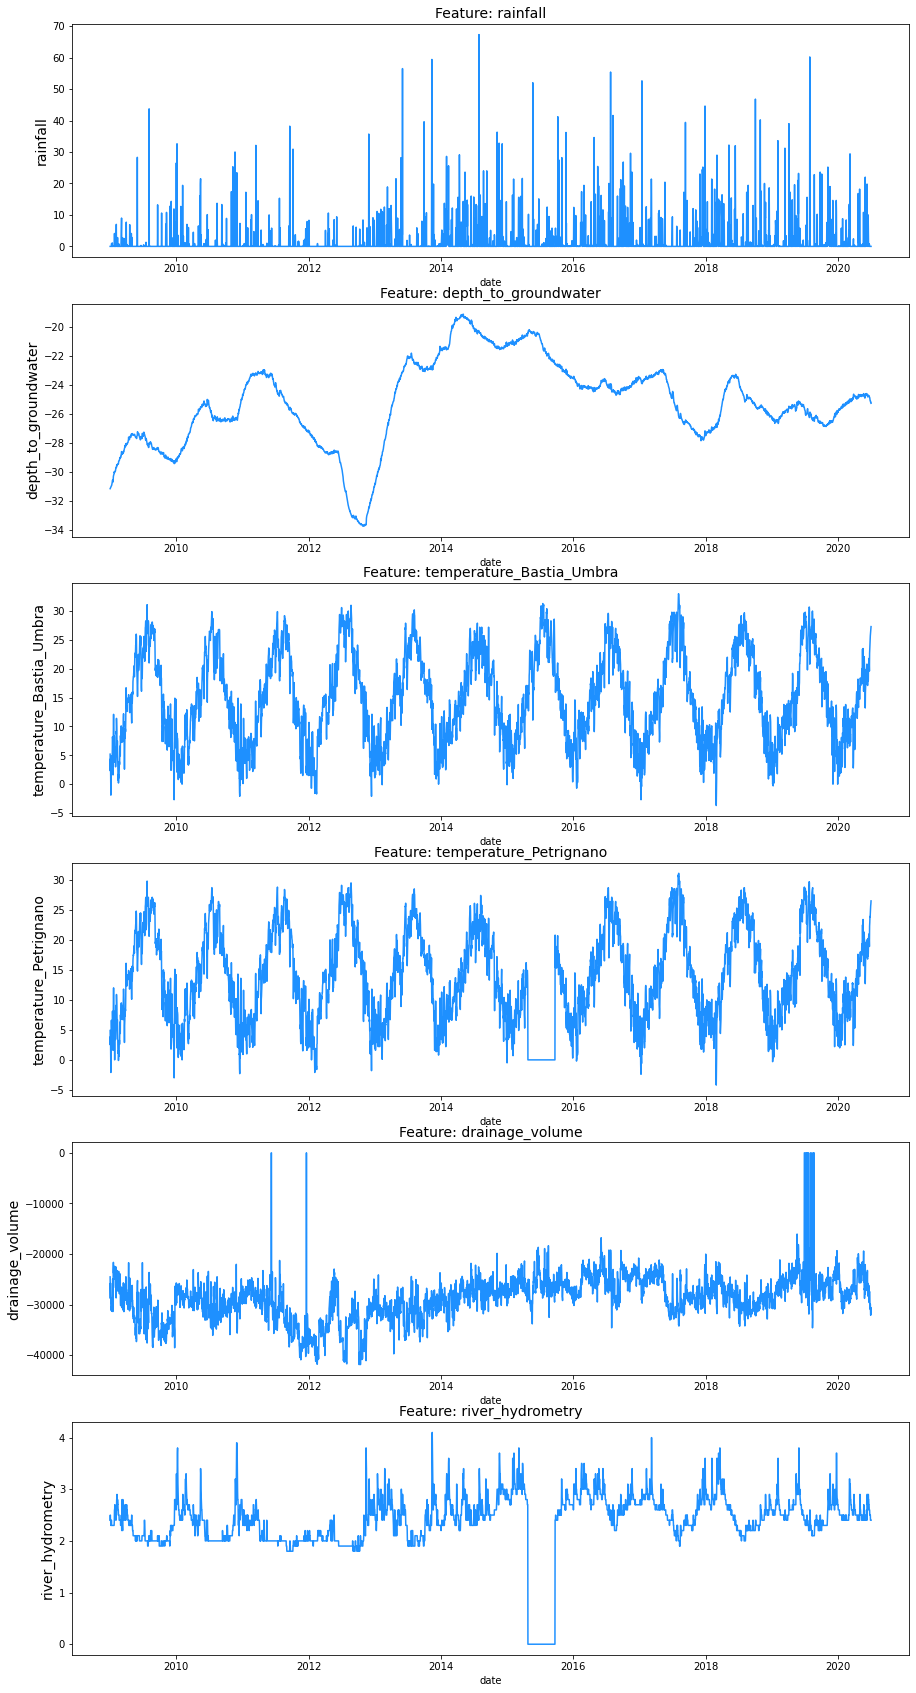

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

# plot a lineplot for all the columns 
for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

* After observing all the time series, we can see that there is something unusual at some places. 
* The Drainage Volume and River Hydrometry columns have "zero" value at  some points. 
* However, as per data description they are not "zero" but actually NULL

### Handling Missing Values 

In [ ]:
df.isna().sum()

date                         0
rainfall                     0
depth_to_groundwater        27
temperature_Bastia_Umbra     0
temperature_Petrignano       0
drainage_volume              1
river_hydrometry             0
dtype: int64

#### Replacing 0 by Null for Drainage Volume and River Hydrometry. 

In [ ]:
df['river_hydrometry'] =df['river_hydrometry'].replace(0, np.nan)

In [ ]:
df['drainage_volume'] =df['drainage_volume'].replace(0, np.nan)

In [ ]:
df.isna().sum()

date                          0
rainfall                      0
depth_to_groundwater         27
temperature_Bastia_Umbra      0
temperature_Petrignano        0
drainage_volume              26
river_hydrometry            150
dtype: int64

After replacing "zero" by NULL, we can see that drainage_volume and river_hydrometry has 26 and 150 respectively 

#### Fill Na Values with Linearly Interpolated Value

Here linear interpolated method is chosen because it will carry some of the characteristics of neighbouring values

In [ ]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

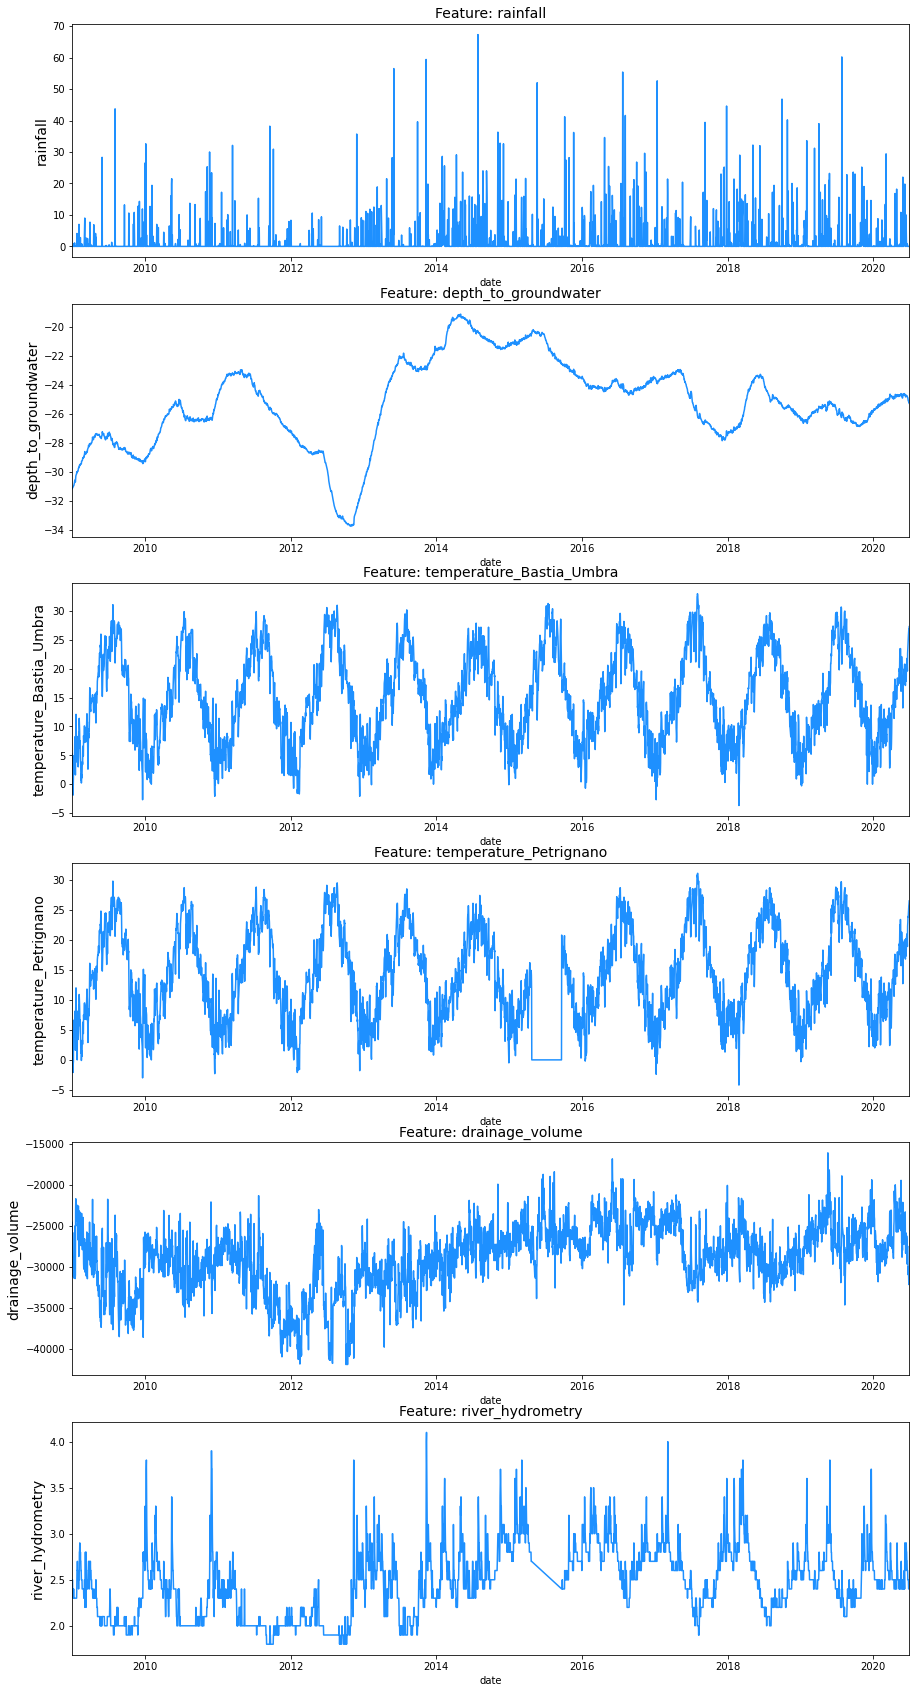

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])  

Now all the missing values have been handled. 

In [ ]:
df.isna().sum()

date                        0
rainfall                    0
depth_to_groundwater        0
temperature_Bastia_Umbra    0
temperature_Petrignano      0
drainage_volume             0
river_hydrometry            0
dtype: int64

Let's understand each time series in detail by applying time series decomposition

### Time Series Decomposition

In [ ]:
# set date as the index of the dataframe
df.set_index('date', inplace=True)

In [ ]:
df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='date', length=4199, freq=None)

Here we can see that observations range from 1st Jan 2009 to 30th June 2020

#### Decomposition of Rainfall Time Series

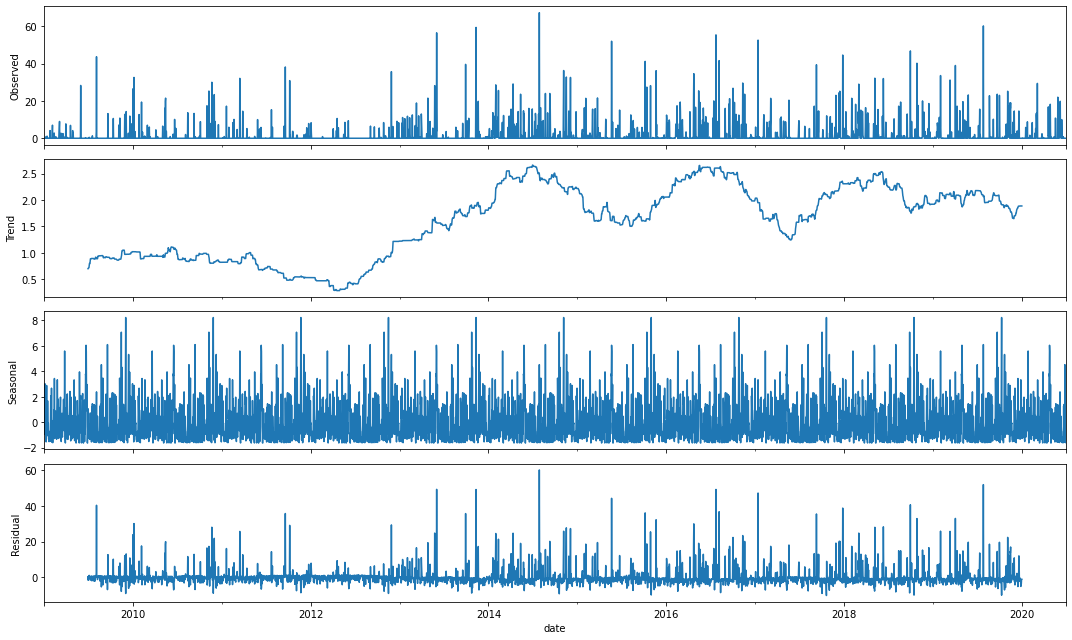

In [ ]:
rcParams['figure.figsize'] = 15, 9

# decompose the time series using python library statsmodels tsa
decomposed = seasonal_decompose(df['rainfall'], freq=360)
_ = decomposed.plot()

Here the original time series does have some random variations involved. The individual components will give more insights on the pattern.

Seasonality: 


*   From the seasonal component, we can observe that the time series has peaks at the end of each year. 
*   That means it recieved highest rainfall during the last few months of the year. 
*   It is observed that November and December are the rainest months in Italy.
*   Hence, our observation from the time series, is in accordance with this fact. 

Trend: 


*   This time series mostly shows an increasing trend as we move further in time.
*   This means that amount of rainfall increased over the years except time between 2012-2014 where it decreased momentorily 





#### Decomposition of temperature_Bastia_Umbra time series

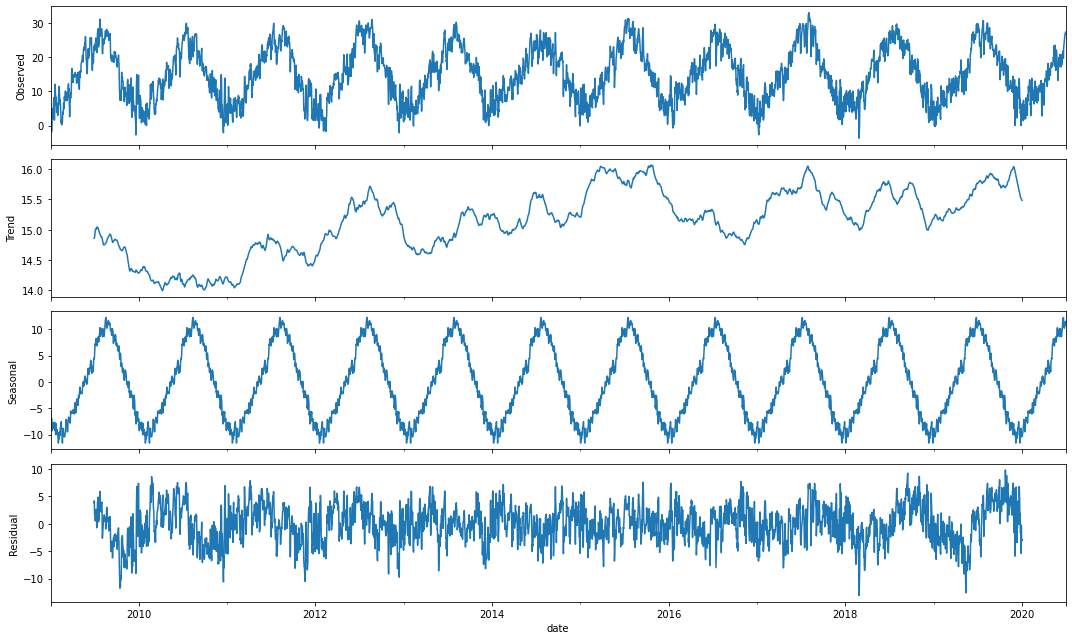

In [ ]:
rcParams['figure.figsize'] = 15, 9

decomposed = seasonal_decompose(df['temperature_Bastia_Umbra'], freq=360)
_ = decomposed.plot()

Here the original time series does show good seasonality with some noise at some places. 

Seasonality: 
*   From the seasonal component, we can observe that the time series has peaks at the approx middle of each year.
*   That means Bastia had the highest temperature during the middle of the year. 
*   It is observed that July is the hottest month in Italy.
*   Hence, our observation from the time series, is in accordance with this fact. 

Trend: 
*   The time series doesn't show a great increasing trend.
*   However we can observe that temperature was lower upto 2011 and then it increased till 2015 and then it remianed fairly constant thereafter. 



#### Decomposition of temperature_Petrignano time series

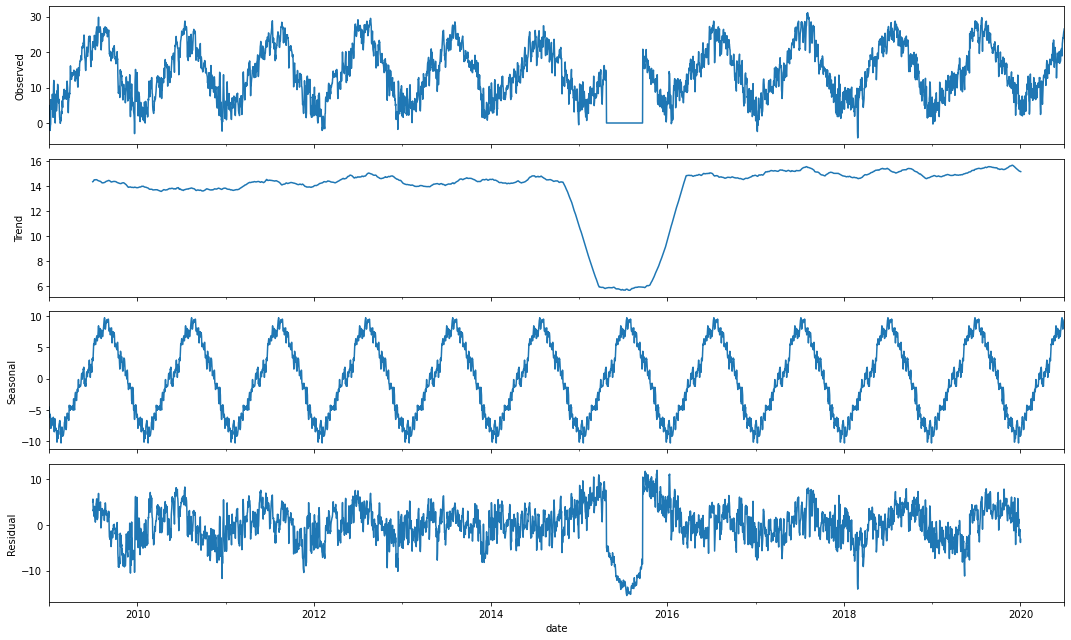

In [ ]:
rcParams['figure.figsize'] = 15, 9

decomposed = seasonal_decompose(df['temperature_Petrignano'], freq=360)
_ = decomposed.plot()

Here the original time series does show good seasonality. However there is one portion where the temperature is zero which is different than what we can expect. 

Seasonality: 
*   From the seasonal component, we can observe that the time series has peaks at the approx middle of each year.
*   That means Petrignano had the highest temperature during the middle of the year. 
*   It is observed that July is the hottest month in Italy.
*   Hence, our observation from the time series, is in accordance with this fact. 

Trend: 
*   The time series is quiet constant throughtout except the sudden downhill between 2014-2016


#### Drainage Volume

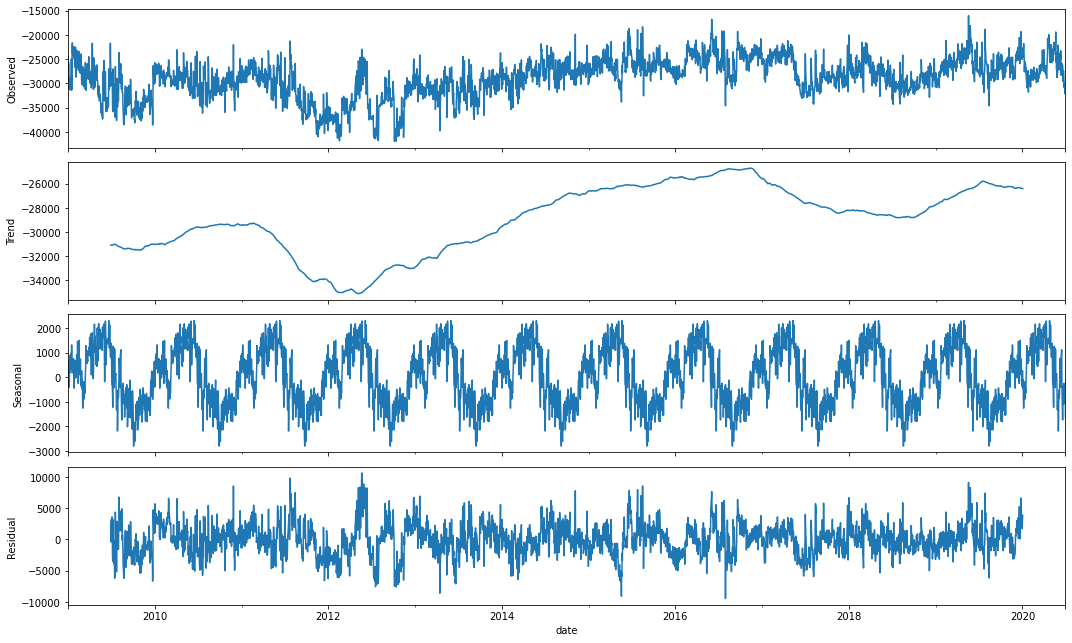

In [ ]:
rcParams['figure.figsize'] = 15, 9

decomposed = seasonal_decompose(df['drainage_volume'], freq=360)
_ = decomposed.plot()

Here the original time series does have some random variations involved. The individual components will give more insights on the pattern.

Seasonality: 
*   From the seasonal component, we can observe that the time series has peaks at approx middle of each year. 
*   That means it more water was utilized during the middle of the year. 
*   It seems that people use more water in summer. 

Trend: 
*   The amount of water used decreased during 2012 - 2013 and then it increased over time. 
*   From the Rainfall time series we observed that rainfall decreased between 2012 - 2014. Hence this might be one of the reasons why less water was used from the plants. 





#### River Hydrometry

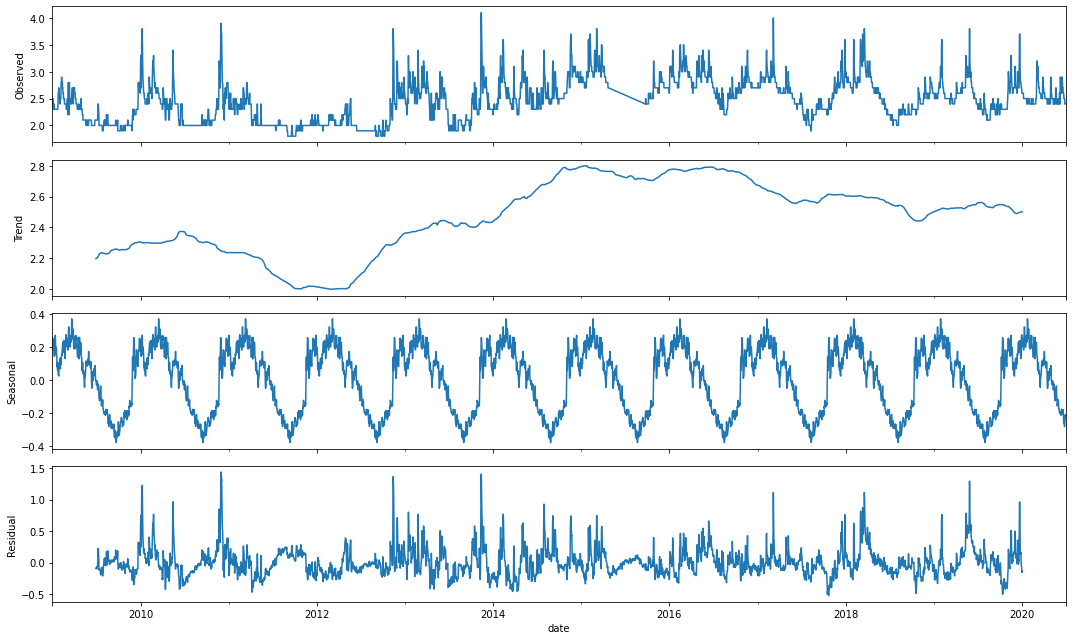

In [ ]:
rcParams['figure.figsize'] = 15, 9

decomposed = seasonal_decompose(df['river_hydrometry'], freq=360)
_ = decomposed.plot()

Here the original time series does have some random variations involved. The individual components will give more insights on the pattern.

Seasonality: 
*   From the seasonal component, we can observe that the time series has peaks at approx middle of each year. 
*   That means ground water level was high during the middle of the year.  

Trend: 
*   The amount of grounwdwater decreased around 2012 - 2013 and then it increased over time. 
*   From the Rainfall time series we observed that rainfall decreased between 2012 - 2014. Hence this might be one of the reasons for lower groundwater level. 





#### Depth to Groundwater

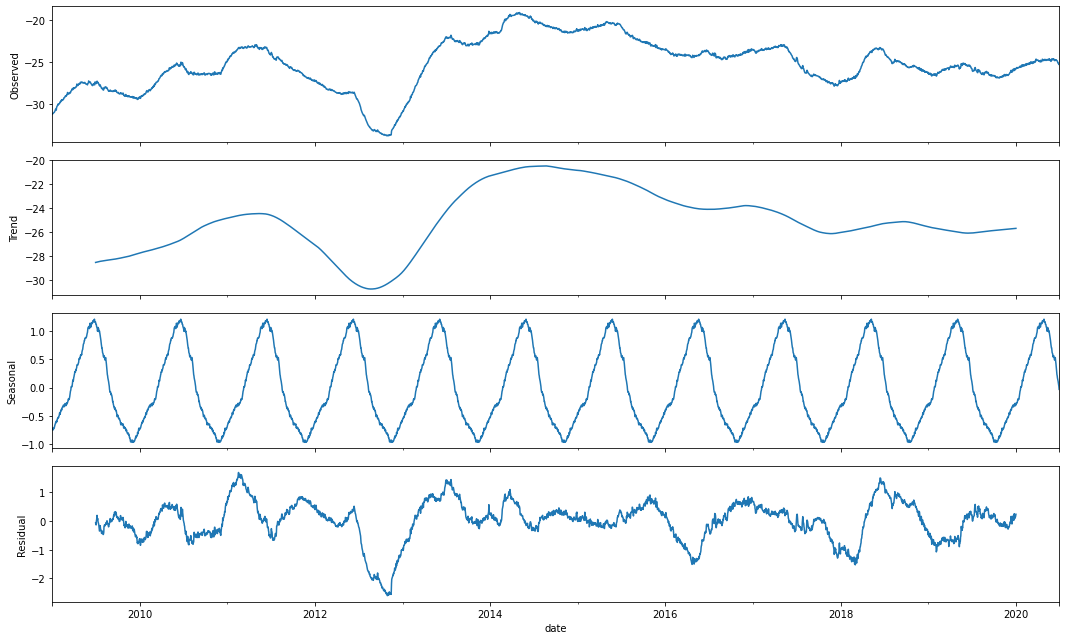

In [ ]:
rcParams['figure.figsize'] = 15, 9

decomposed = seasonal_decompose(df['depth_to_groundwater'], freq=360)
_ = decomposed.plot()

Here the original time series does show a very seasonal pattern. The individual components will give more insights on the pattern.

Seasonality: 
*   From the seasonal component, we can observe that the time series has peaks at approx middle of each year. 
*   That means depth to ground water was high during the middle of the year.  

Trend: 
*   The depth to ground water decreased around 2012 - 2013 and then it increased over time. 
*   From the Rainfall time series we observed that rainfall decreased between 2012 - 2014. Hence this might be one of the reasons for lower depth to ground water. 





### Stationary 

Calculating constant mean and variance 

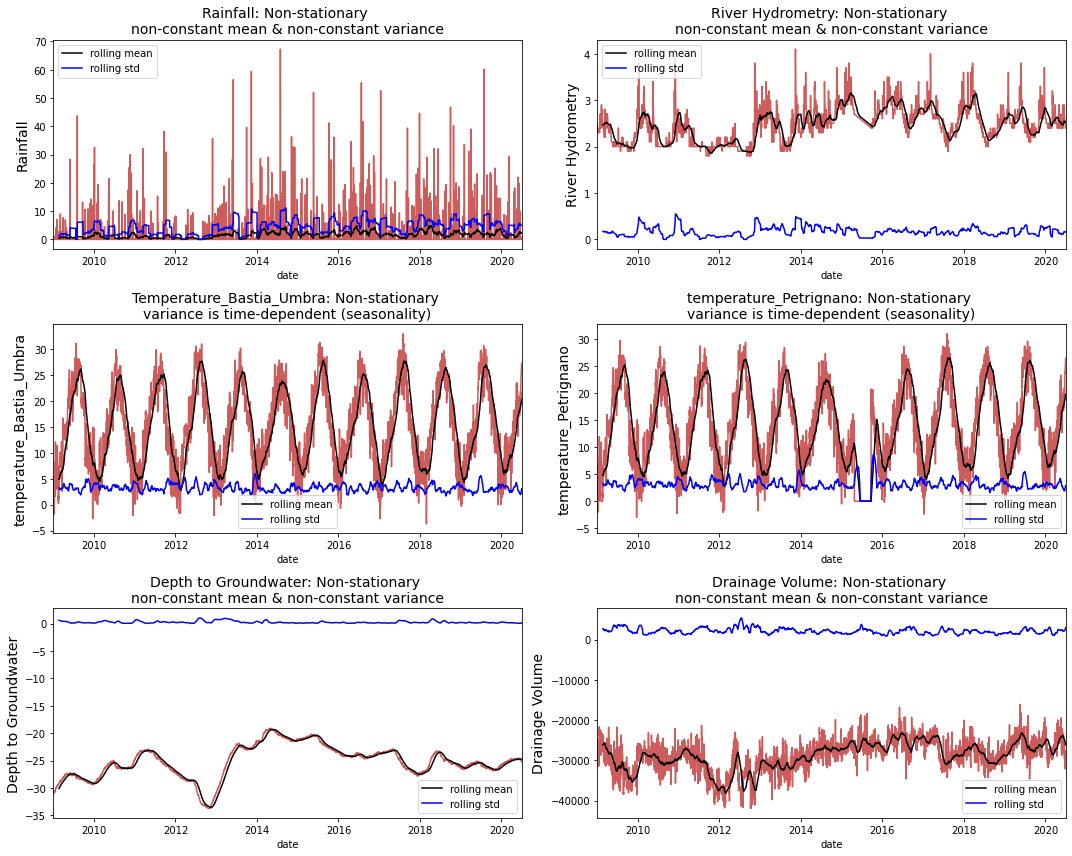

In [ ]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# plot time series Rainfall and find rolling mean and std
sns.lineplot(x=df.index, y=df['rainfall'], ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.index, y=df['rainfall'].rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df['rainfall'].rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

# plot time series temperature_Bastia_Umbra and find rolling mean and std
sns.lineplot(x=df.index, y=df['temperature_Bastia_Umbra'], ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.index, y=df['temperature_Bastia_Umbra'].rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df['temperature_Bastia_Umbra'].rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Temperature_Bastia_Umbra: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='temperature_Bastia_Umbra', fontsize=14)

# plot time series river_hydrometry and find rolling mean and std
sns.lineplot(x=df.index, y=df['river_hydrometry'], ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.index, y=df['river_hydrometry'].rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df['river_hydrometry'].rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('River Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='River Hydrometry', fontsize=14)

# plot time series temperature_Petrignano and find rolling mean and std
sns.lineplot(x=df.index, y=df['temperature_Petrignano'], ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.index, y=df['temperature_Petrignano'].rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df['temperature_Petrignano'].rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('temperature_Petrignano: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 1].set_ylabel(ylabel='temperature_Petrignano', fontsize=14)

# plot time series depth_to_groundwater and find rolling mean and std
sns.lineplot(x=df.index, y=df['depth_to_groundwater'], ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.index, y=df['depth_to_groundwater'].rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df['depth_to_groundwater'].rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

# plot time series drainage_volume and find rolling mean and std
sns.lineplot(x=df.index, y=df['drainage_volume'], ax=ax[2, 1], color='indianred')
sns.lineplot(x=df.index, y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[2, 1], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[2, 1], color='blue', label='rolling std')
ax[2, 1].set_title('Drainage Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 1].set_ylabel(ylabel='Drainage Volume', fontsize=14)


for i in range(3):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i,1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

* We can observe that all features except Temperature have non-constant mean and non-constant variance. '
* Therefore, none of them are stationary. 
* However, Temperature shows strong seasonality (hot in summer, cold in winter) and therefore it is not stationary either.

### Visualize Autocorrelation 



*   It is the correlation between time series with a lagged version of itself.
*   The correlation between the observation at the current time spot and the observations at previous time spots.
*   The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.





*   Also, we can see a blue area in the ACF plot, which depicts the 95% confidence interval and is in indicator for the significance threshold.
*   That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.


 

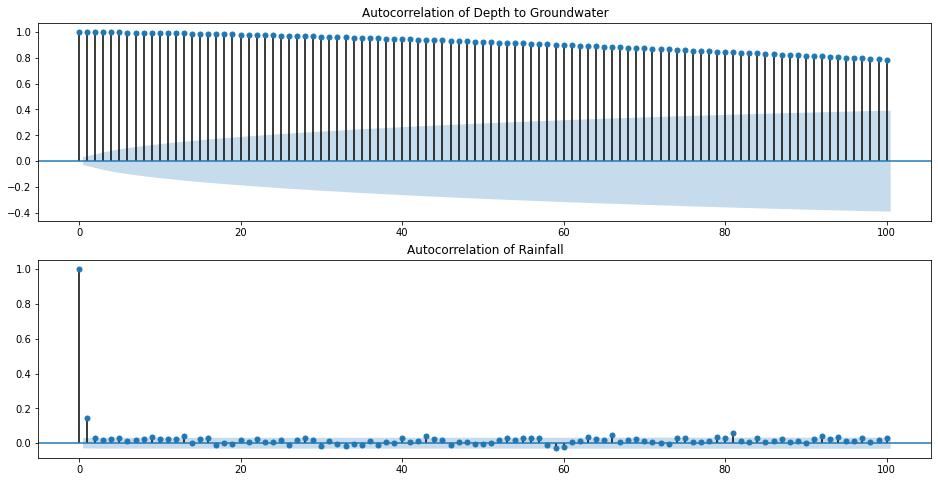

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
_ = plot_acf(df['depth_to_groundwater'], lags=100, ax=ax[0])
ax[0].set_title('Autocorrelation of Depth to Groundwater')
_ = plot_acf(df['rainfall'], lags=100, ax=ax[1])
_ = ax[1].set_title('Autocorrelation of Rainfall')

Observation of Depth to Groundwater: 
*   Here we can see that autocorrelation decreases as lag increases. 
*   However for all the lags, the autocorrelation remains outside the confidence interval (i.e they are non zero). 
*   Therefore there is linear association between observations separated by  lags.

Observation of Rainfall: 
*   Here we can see that autocorrelation decreases as lag increases. 
*   For all the lags except the first two, the autocorrelation lies within the confidence interval (i.e they are close to zero). 
*   Hence, there is no linear association between observations separated by  lags.








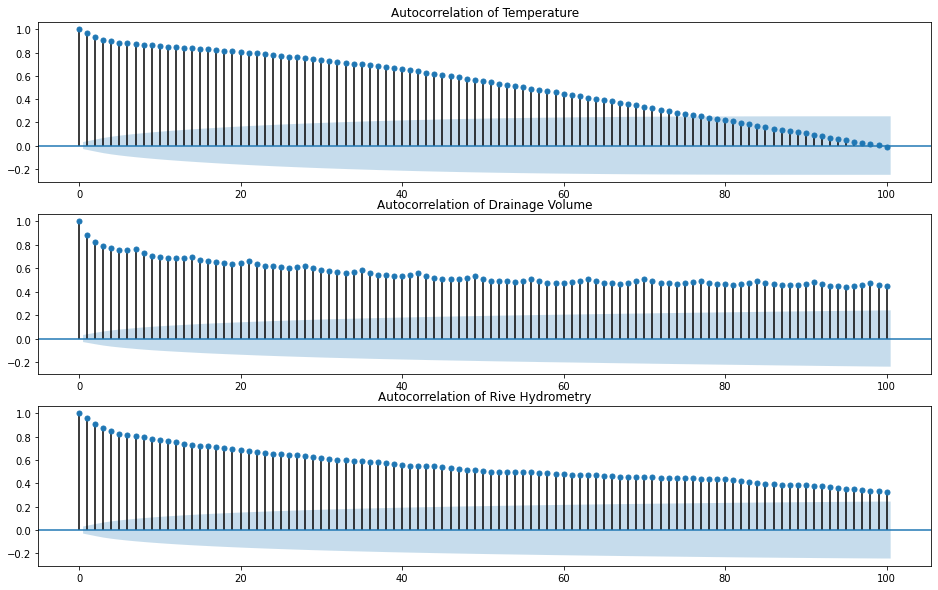

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))
_ = plot_acf(df['temperature_Petrignano'], lags=100, ax=ax[0])
ax[0].set_title('Autocorrelation of Temperature')
_ = plot_acf(df['drainage_volume'], lags=100, ax=ax[1])
_ = ax[1].set_title('Autocorrelation of Drainage Volume')
_ = plot_acf(df['river_hydrometry'], lags=100, ax=ax[2])
_ = ax[2].set_title('Autocorrelation of Rive Hydrometry')

Observation of Temperature: 
*   Here we can see that autocorrelation decreases as lag increases. 
*   As the lag increases, the autocorrelation becomes close to zero and then it becomes negative.
*   This autocorrelation helps us detect seasonality in data

Observation of Drainage_volume: 
*   Here we can see that autocorrelation decreases as lag increases. 
*   However for all the lags, the autocorrelation remains outside the confidence interval (i.e they are non zero). 

Observation of River Hydrometry: 
*   Here we can see that autocorrelation decreases as lag increases. 
*   However for most of the lags, the autocorrelation remains outside the confidence interval (i.e they are non zero)


### White Noise

*   A time series is white noise if the variables are independent and identically distributed with a mean of zero.
*   This means that all variables have the same variance and each value has a zero correlation with all other values in the series.





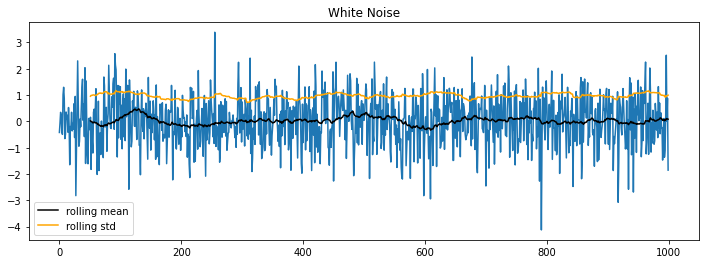

In [ ]:
white_noise = pd.Series(np.random.normal(loc=0, scale=1, size=1000))

plt.figure(figsize=(12, 4))
sns.lineplot(x = range(0,1000), y = white_noise);
sns.lineplot(x = range(0,1000), y = white_noise.rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x = range(0,1000), y = white_noise.rolling(rolling_window).std(),  color='orange', label='rolling std')
plt.title('White Noise');

Here we can see that rolling mean is almost 0 and std is 1.

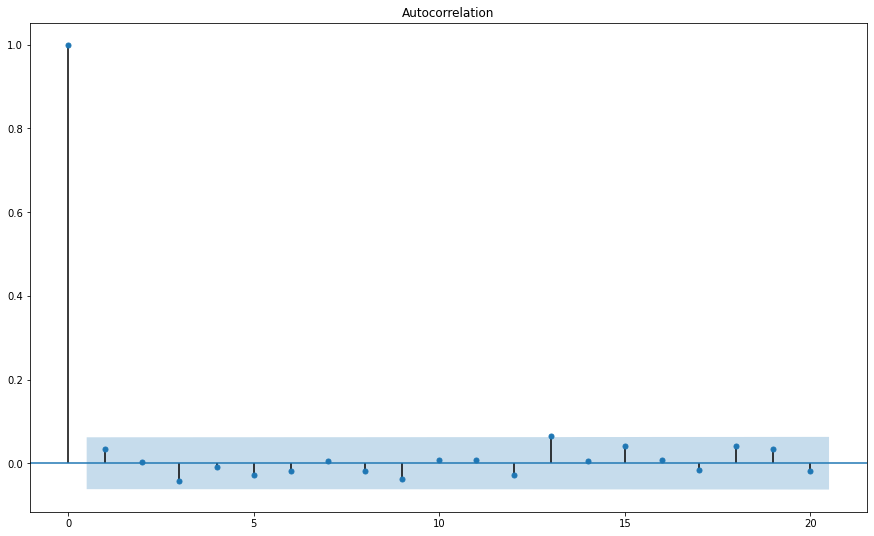

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

Here we can see that autocorrelation is close to zero as lag increases

### Conclusion

* Time series showed that November and December receive highest rainfall in italy. 
* July is the hottest month. During this month, more water was used by people.
* This might mean that people use more water in summer.
*  River Hydrometry (waterbody water levels) is high during the middle of the year. 
* This would mean that waterbody accumulates more water by middle of the year.
* Then, after summer season, the water level decreases.
* Thus, we can say that people should save water after summer since there might be water shortage.






